In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from collections import Counter


   Hand Size                                   Best Hand  Score  \
0          3                     [Shrimp, Pork, Noodles]     12   
1          4        [Shrimp, Ginger, Soy Sauce, Noodles]     20   
2          5  [Shrimp, Pork, Ginger, Soy Sauce, Noodles]     27   

   Score per Card  
0             4.0  
1             5.0  
2             5.4  


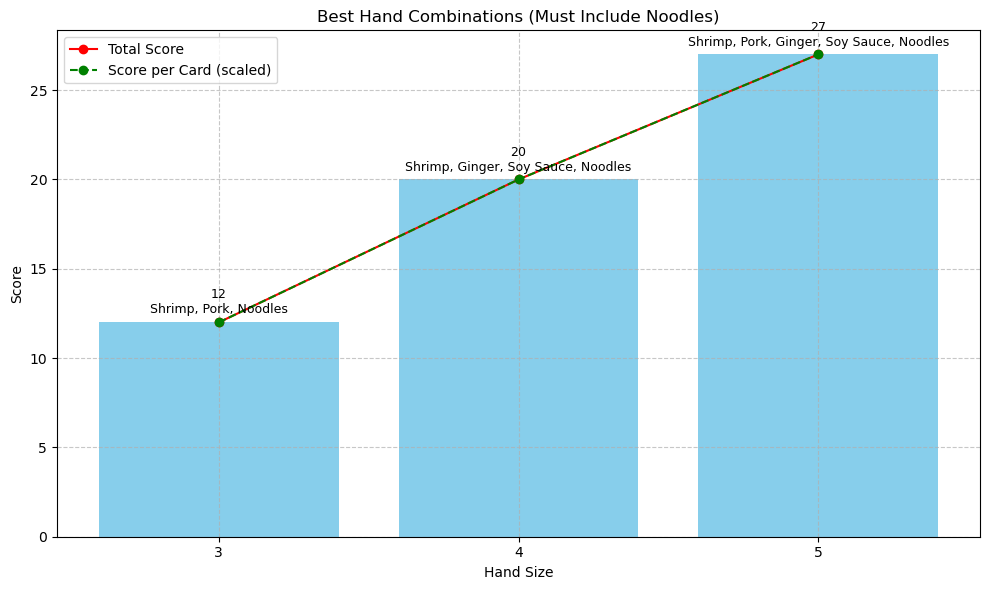

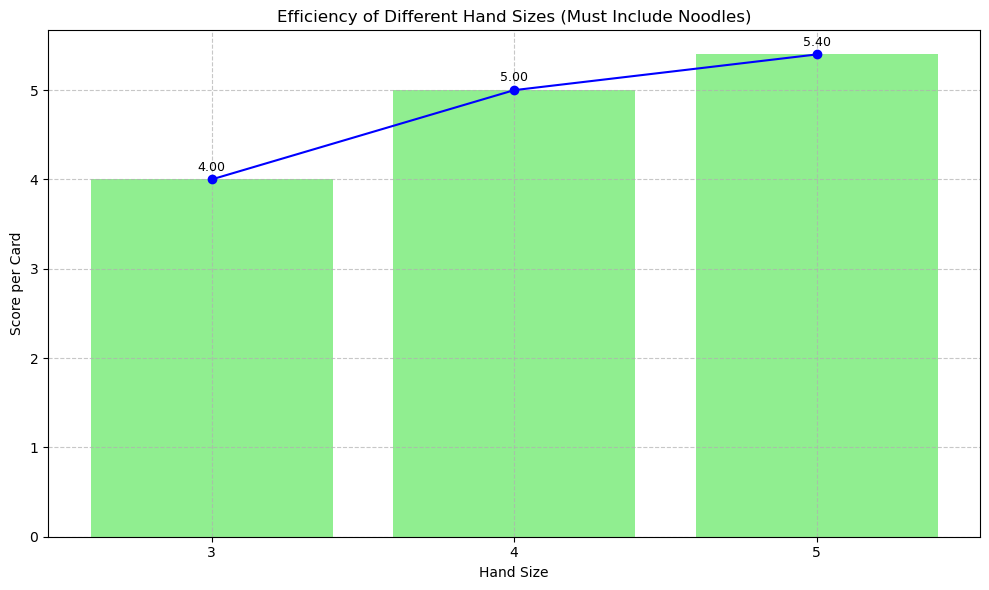

In [8]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

# Define the cards with their base points, quantities, and discard effects
cards = {
    'Shrimp': {'base_points': 6, 'quantity': 1, 'discard_effect': 4},
    'Pork': {'base_points': 5, 'quantity': 1, 'discard_effect': 3},
    'Chicken': {'base_points': 3, 'quantity': 1, 'discard_effect': 2},
    'Ginger': {'base_points': 2, 'quantity': 2, 'discard_effect': 0},
    'Green Onion': {'base_points': 3, 'quantity': 2, 'discard_effect': 0},
    'Soy Sauce': {'base_points': 1, 'quantity': 3, 'discard_effect': 0},
    'Mushrooms': {'base_points': 2, 'quantity': 3, 'discard_effect': 0},
    'Noodles': {'base_points': 1, 'quantity': 5, 'discard_effect': 0}
}

# Define card combinations that give bonus points
combinations = {
    ('Shrimp', 'Ginger'): 3,  # +3 points
    ('Shrimp', 'Soy Sauce', 'Ginger'): 5,  # +5 points
    ('Pork', 'Mushrooms'): 3,  # +3 points
    ('Chicken', 'Green Onion'): 2,  # +2 points
    ('Chicken', 'Ginger', 'Green Onion'): 4,  # +4 points
    ('Ginger', 'Pork'): 2,  # +2 points
    ('Green Onion', 'Shrimp'): 2,  # +2 points
    ('Soy Sauce', 'Green Onion'): 1,  # +1 point
    ('Soy Sauce', 'Ginger'): 2,  # +2 points
    ('Mushrooms', 'Chicken'): 1,  # +1 point
}

def calculate_score(hand):
    """Calculate the score for a given hand of cards"""
    if not hand:
        return 0
    
    # Calculate base score
    base_score = sum(cards[card]['base_points'] for card in hand)
    
    # Calculate bonus points from combinations
    bonus_points = 0
    for combo, points in combinations.items():
        # Check if all cards in the combination are in the hand
        if all(card in hand for card in combo):
            bonus_points += points
    
    return base_score + bonus_points

def analyze_best_combinations_with_constraints():
    """Analyze the best card combinations with the given constraints:
    - 3 to 5 different ingredients
    - Must include Noodles
    """
    # Get unique card types (ignoring quantities for now)
    unique_cards = list(cards.keys())
    
    results = []
    
    # Analyze hands of different sizes (3 to 5)
    for hand_size in range(3, 6):
        # Generate all possible combinations of the given hand size
        # We'll always include Noodles and select hand_size-1 other cards
        other_cards = [card for card in unique_cards if card != 'Noodles']
        best_score = 0
        best_hand = None
        
        for hand_combo in itertools.combinations(other_cards, hand_size - 1):
            # Add Noodles to the hand
            hand = list(hand_combo) + ['Noodles']
            score = calculate_score(hand)
            
            if score > best_score:
                best_score = score
                best_hand = hand
        
        results.append({
            'Hand Size': hand_size,
            'Best Hand': best_hand,
            'Score': best_score,
            'Score per Card': best_score / hand_size
        })
    
    return pd.DataFrame(results)

# Run the analysis and display results
results = analyze_best_combinations_with_constraints()
print(results)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(results['Hand Size'], results['Score'], color='skyblue')
plt.plot(results['Hand Size'], results['Score'], 'ro-', label='Total Score')
plt.plot(results['Hand Size'], results['Score per Card'] * results['Hand Size'], 'go--', label='Score per Card (scaled)')

for i, row in results.iterrows():
    plt.text(row['Hand Size'], row['Score'] + 0.5, 
             f"{row['Score']}\n{', '.join(row['Best Hand'])}", 
             ha='center', fontsize=9)

plt.xlabel('Hand Size')
plt.ylabel('Score')
plt.title('Best Hand Combinations (Must Include Noodles)')
plt.xticks([3, 4, 5])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Add a second visualization to show score per card more clearly
plt.figure(figsize=(10, 6))
plt.bar(results['Hand Size'], results['Score per Card'], color='lightgreen')
plt.plot(results['Hand Size'], results['Score per Card'], 'bo-', label='Score per Card')

for i, row in results.iterrows():
    plt.text(row['Hand Size'], row['Score per Card'] + 0.1, 
             f"{row['Score per Card']:.2f}", 
             ha='center', fontsize=9)

plt.xlabel('Hand Size')
plt.ylabel('Score per Card')
plt.title('Efficiency of Different Hand Sizes (Must Include Noodles)')
plt.xticks([3, 4, 5])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Top 5 Combinations for Each Hand Size:

Hand Size: 3
                       Cards  Total Score  Base Score  Bonus Score  Score per Card
       Shrimp, Pork, Noodles           12          12            0        4.000000
     Shrimp, Ginger, Noodles           12           9            3        4.000000
Shrimp, Green Onion, Noodles           12          10            2        4.000000
    Pork, Mushrooms, Noodles           11           8            3        3.666667
    Shrimp, Chicken, Noodles           10          10            0        3.333333

Hand Size: 4
                                Cards  Total Score  Base Score  Bonus Score  Score per Card
   Shrimp, Ginger, Soy Sauce, Noodles           20          10           10            5.00
        Shrimp, Pork, Ginger, Noodles           19          14            5            4.75
   Shrimp, Pork, Green Onion, Noodles           17          15            2            4.25
     Shrimp, Pork, Mushrooms, Noodles           17          14     

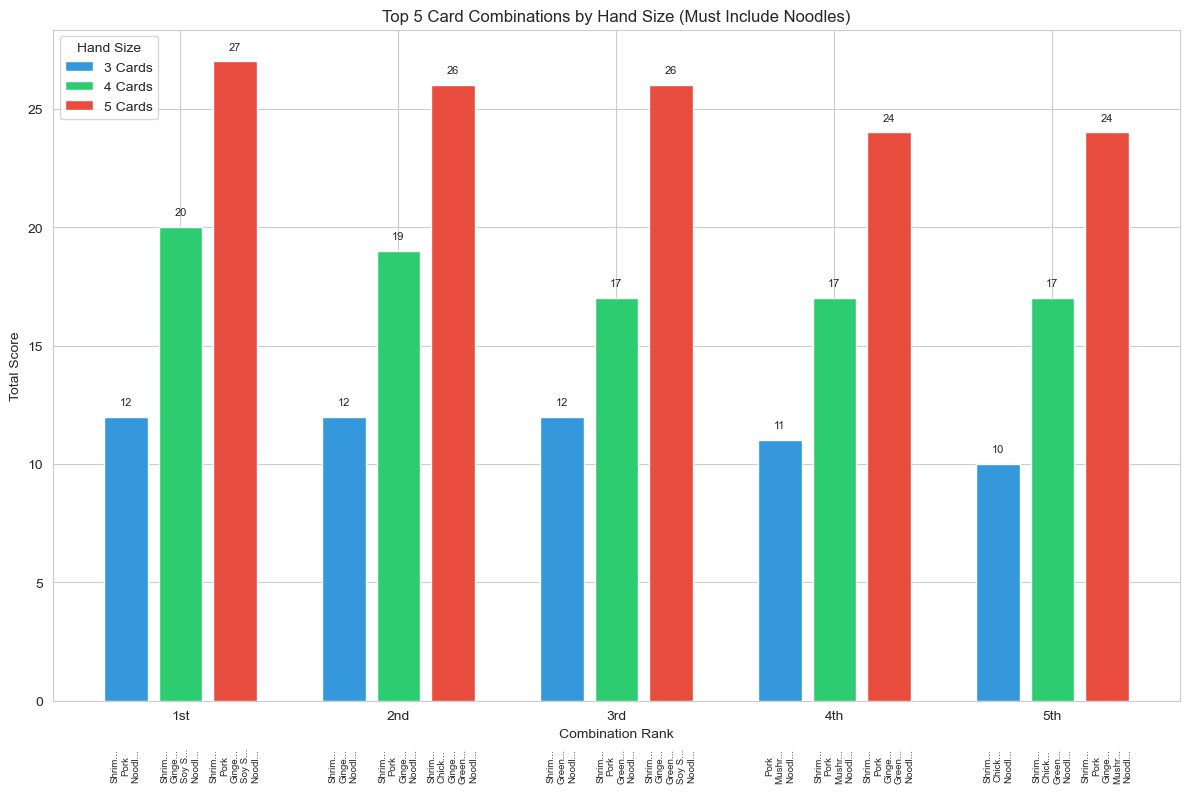

In [10]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the cards with their base points, quantities, and discard effects
cards = {
    'Shrimp': {'base_points': 6, 'quantity': 1, 'discard_effect': 4},
    'Pork': {'base_points': 5, 'quantity': 1, 'discard_effect': 3},
    'Chicken': {'base_points': 3, 'quantity': 1, 'discard_effect': 2},
    'Ginger': {'base_points': 2, 'quantity': 2, 'discard_effect': 0},
    'Green Onion': {'base_points': 3, 'quantity': 2, 'discard_effect': 0},
    'Soy Sauce': {'base_points': 1, 'quantity': 3, 'discard_effect': 0},
    'Mushrooms': {'base_points': 2, 'quantity': 3, 'discard_effect': 0},
    'Noodles': {'base_points': 1, 'quantity': 5, 'discard_effect': 0}
}

# Define card combinations that give bonus points
combinations = {
    ('Shrimp', 'Ginger'): 3,  # +3 points
    ('Shrimp', 'Soy Sauce', 'Ginger'): 5,  # +5 points
    ('Pork', 'Mushrooms'): 3,  # +3 points
    ('Chicken', 'Green Onion'): 2,  # +2 points
    ('Chicken', 'Ginger', 'Green Onion'): 4,  # +4 points
    ('Ginger', 'Pork'): 2,  # +2 points
    ('Green Onion', 'Shrimp'): 2,  # +2 points
    ('Soy Sauce', 'Green Onion'): 1,  # +1 point
    ('Soy Sauce', 'Ginger'): 2,  # +2 points
    ('Mushrooms', 'Chicken'): 1,  # +1 point
}

def calculate_score(hand):
    """Calculate the score for a given hand of cards"""
    if not hand:
        return 0
    
    # Calculate base score
    base_score = sum(cards[card]['base_points'] for card in hand)
    
    # Calculate bonus points from combinations
    bonus_points = 0
    for combo, points in combinations.items():
        # Check if all cards in the combination are in the hand
        if all(card in hand for card in combo):
            bonus_points += points
    
    return base_score + bonus_points

def analyze_top_combinations_with_constraints(top_n=5):
    """Analyze the top N card combinations for each hand size with the given constraints:
    - 3 to 5 different ingredients
    - Must include Noodles
    """
    # Get unique card types (ignoring quantities for now)
    unique_cards = list(cards.keys())
    other_cards = [card for card in unique_cards if card != 'Noodles']
    
    all_results = []
    summary_results = []
    
    # Analyze hands of different sizes (3 to 5)
    for hand_size in range(3, 6):
        # Generate all possible combinations of the given hand size
        # We'll always include Noodles and select hand_size-1 other cards
        hand_results = []
        
        for hand_combo in itertools.combinations(other_cards, hand_size - 1):
            # Add Noodles to the hand
            hand = list(hand_combo) + ['Noodles']
            score = calculate_score(hand)
            
            # Calculate base and bonus points separately for analysis
            base_score = sum(cards[card]['base_points'] for card in hand)
            bonus_score = score - base_score
            
            hand_results.append({
                'Hand Size': hand_size,
                'Hand': hand,
                'Cards': ', '.join(hand),
                'Total Score': score,
                'Base Score': base_score,
                'Bonus Score': bonus_score,
                'Score per Card': score / hand_size
            })
        
        # Sort by total score and get top N
        hand_results.sort(key=lambda x: x['Total Score'], reverse=True)
        top_results = hand_results[:top_n]
        all_results.extend(top_results)
        
        # Add the best result to the summary
        if top_results:
            summary_results.append({
                'Hand Size': hand_size,
                'Best Hand': top_results[0]['Hand'],
                'Score': top_results[0]['Total Score'],
                'Score per Card': top_results[0]['Score per Card']
            })
    
    return pd.DataFrame(all_results), pd.DataFrame(summary_results)

# Run the analysis and display results
top_combinations, summary = analyze_top_combinations_with_constraints(top_n=5)

# Display the top 5 combinations for each hand size
print("Top 5 Combinations for Each Hand Size:")
for size in range(3, 6):
    print(f"\nHand Size: {size}")
    size_results = top_combinations[top_combinations['Hand Size'] == size]
    print(size_results[['Cards', 'Total Score', 'Base Score', 'Bonus Score', 'Score per Card']].to_string(index=False))

# Visualize the best combinations
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create a grouped bar chart for the top combinations
hand_sizes = top_combinations['Hand Size'].unique()
colors = ['#3498db', '#2ecc71', '#e74c3c']  # Blue, Green, Red

for i, size in enumerate(hand_sizes):
    size_data = top_combinations[top_combinations['Hand Size'] == size]
    x_pos = [j + (i * 0.25) for j in range(len(size_data))]
    plt.bar(x_pos, size_data['Total Score'], width=0.2, color=colors[i], 
            label=f'{size} Cards')
    
    # Add card names as labels
    for j, (_, row) in enumerate(size_data.iterrows()):
        plt.text(x_pos[j], row['Total Score'] + 0.5, 
                 f"{row['Total Score']}", ha='center', fontsize=8)
        
        # Add card names below the x-axis
        card_text = '\n'.join([card[:5] + '...' if len(card) > 5 else card 
                              for card in row['Hand']])
        plt.text(x_pos[j], -2, card_text, ha='center', fontsize=7, 
                 rotation=90, va='top')

plt.xlabel('Combination Rank')
plt.ylabel('Total Score')
plt.title('Top 5 Card Combinations by Hand Size (Must Include Noodles)')
plt.legend(title='Hand Size')
plt.xticks([i + 0.25 for i in range(5)], ['1st', '2nd', '3rd', '4th', '5th'])
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# # Create a detailed breakdown of the top combination for each hand size
# plt.figure(figsize=(10, 6))
# for i, size in enumerate(hand_sizes):
#     size_data = top_combinations[top_combinations['Hand Size'] == size].iloc[0]
#     plt.bar(i, size_data['Base Score'], color='skyblue', label='Base Score' if i == 0 else "")
#     plt.bar(i, size_data['Bonus Score'], bottom=size_data['Base Score'], color='orange', 
#             label='Bonus Score' if i == 0 else "")
    
#     # Add labels